In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [74]:
data = pd.read_csv('train.csv')

In [75]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
columns = data.columns
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
num_missing = data.isna().sum().sum()

In [82]:
def per_missing(data):
    all_data = data.size
    num_missing = data.isna().sum().sum()
    missing  = num_missing/all_data *100
    print(f"Percentage of missing values: {missing:.2f}%")

In [83]:
per_missing(data)

Percentage of missing values: 8.10%


In [84]:
data.size

10692

## Check for duplicates

In [85]:
data.duplicated().sum()

0

In [86]:
numerical_columns = data.select_dtypes(include=['number']).columns

In [87]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [37]:
numerical_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [39]:
categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

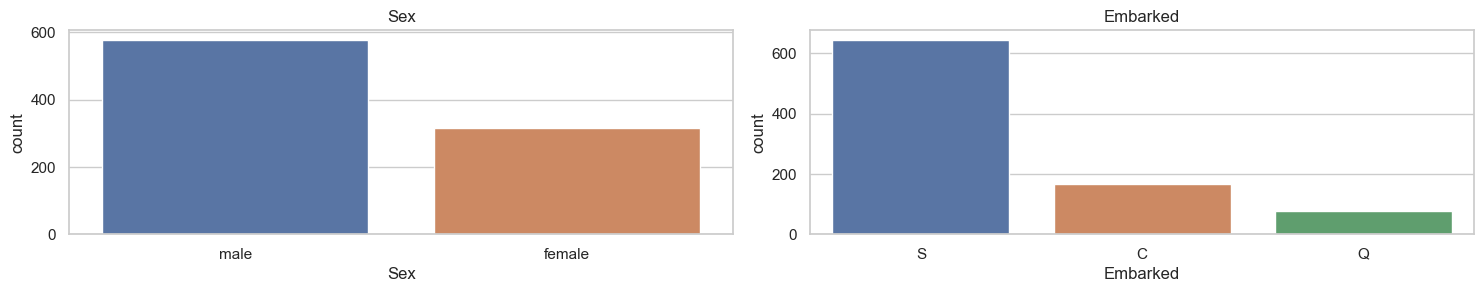

In [88]:
plt.figure(figsize=(15,8))
filtered_features = [feature for feature in categorical_columns if feature not in  ['Name','Ticket','Cabin']]
for i, feature in enumerate(filtered_features):
    plt.subplot(3,2,i+1)
    sns.countplot(data = data,x = feature)
    plt.title(feature)
plt.tight_layout()  
plt.show() 

In [89]:
sns.set(style="whitegrid")

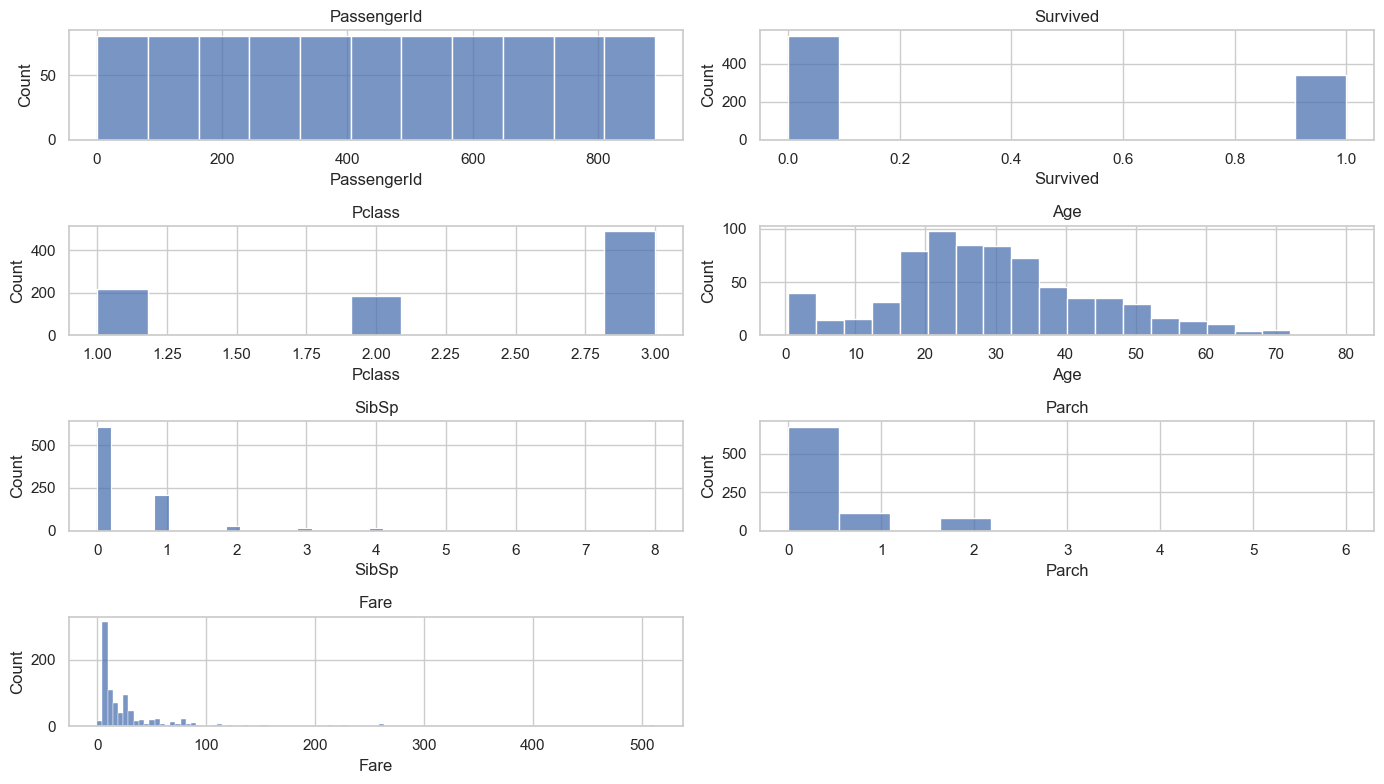

In [90]:
plt.figure(figsize=(14,8))
for i,feature in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data=data,x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [91]:
for col in numerical_columns:
    data[col] = data[col].fillna(value=data[col].mean())

In [92]:
data[numerical_columns].isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [93]:
data[categorical_columns].isna().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [94]:
for col in categorical_columns:
    data[col] = data[col].fillna(value=data[col].mode()[0])

In [95]:
data[categorical_columns].isna().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
lb = LabelEncoder()
for col in categorical_columns:
    data[col] = lb.fit_transform(data[col])

In [101]:
data['Age'] = data['Age'].astype('int64')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(1), int32(5), int64(6)
memory usage: 66.3 KB


In [103]:
data.to_csv('cleaned_data.csv',index=False)